In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_1.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [5]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_1") 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_1") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index(drop=True) 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5


In [6]:
%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/../phoIsoStoch/corrections_hybrid.root


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    1.8s remaining:   26.3s
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    2.0s remaining:   13.3s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    2.0s remaining:    8.5s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    2.2s remaining:    6.4s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    2.5s remaining:    5.2s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    2.7s remaining:    4.2s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    2.7s remaining:    3.3s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    2.8s remaining:    2.6s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    2.9s remaining:    2.1s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    3.3s remaining:    1.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 2.16 s, sys: 1.19 s, total: 3.35 s
Wall time: 5.46 s


In [7]:
qr_mc.df.index.size

3449203

In [8]:
dfmc = qr_mc.getDF()

In [9]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4'] #CovarianceIphiIphi??

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ),
("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True)) ] 

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [10]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   32.6s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   32.7s remaining:  7.9min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   34.1s remaining:  3.8min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   49.0s remaining:  3.4min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.1min remaining:  3.2min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.2min remaining:  2.5min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.2min remaining:  1.9min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.2min remaining:  1.5min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.3min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.3min remaining:   55.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.3min remaining:   42.4s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.3min remaining:   31.6s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 967 ms, sys: 799 ms, total: 1.77 s
Wall time: 1min 21s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   49.8s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   51.2s remaining: 12.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   52.3s remaining:  5.9min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   54.9s remaining:  3.8min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.0min remaining:  3.0min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.0min remaining:  2.2min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.5min remaining:  1.8min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.5min remaining:  1.4min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.6min remaining:   51.6s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.6min remaining:   39.4s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   43.7s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   45.1s remaining: 10.9min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  1.1min remaining:  7.2min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  1.1min remaining:  4.8min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.2min remaining:  3.4min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.3min remaining:  2.6min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.6min remaining:  1.9min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.7min remaining:  1.6min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.7min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.7min remaining:   57.0s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.8min remaining:   43.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrIso, correcting {'rhoSubtraction': True, 'correct': ['PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   50.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   50.4s remaining: 12.2min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   50.6s remaining:  5.7min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   51.9s remaining:  3.6min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   57.9s remaining:  2.8min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.2min remaining:  2.5min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.3min remaining:  2.1min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.4min remaining:  1.7min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.5min remaining:  1.4min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.5min remaining:  1.1min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.6min remaining:   52.5s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.6min remaining:   39.6s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   44.3s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   45.7s remaining: 11.1min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   46.6s remaining:  5.2min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   51.1s remaining:  3.5min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.2min remaining:  3.4min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.4min remaining:  2.9min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.4min remaining:  2.2min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.5min remaining:  1.8min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.5min remaining:  1.4min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.7min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.7min remaining:   56.7s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.8min remaining:   44.8s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 8.5 s, sys: 6.64 s, total: 15.1 s
Wall time: 7min 24s


In [12]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


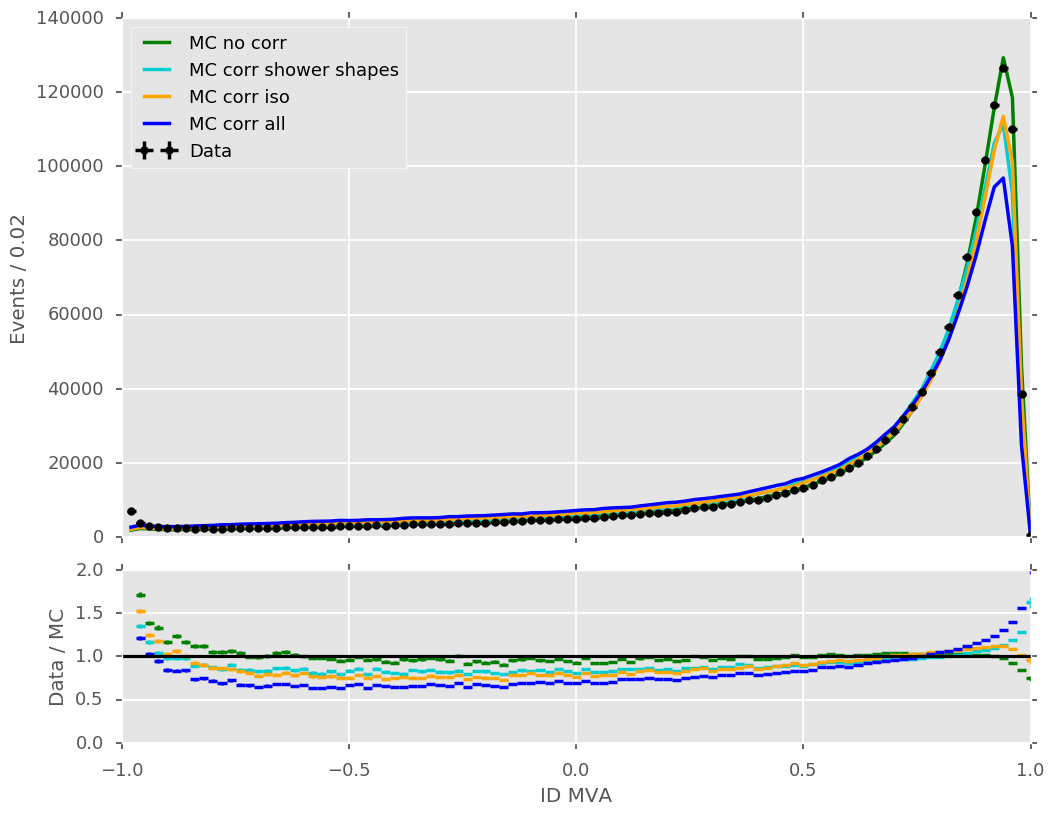

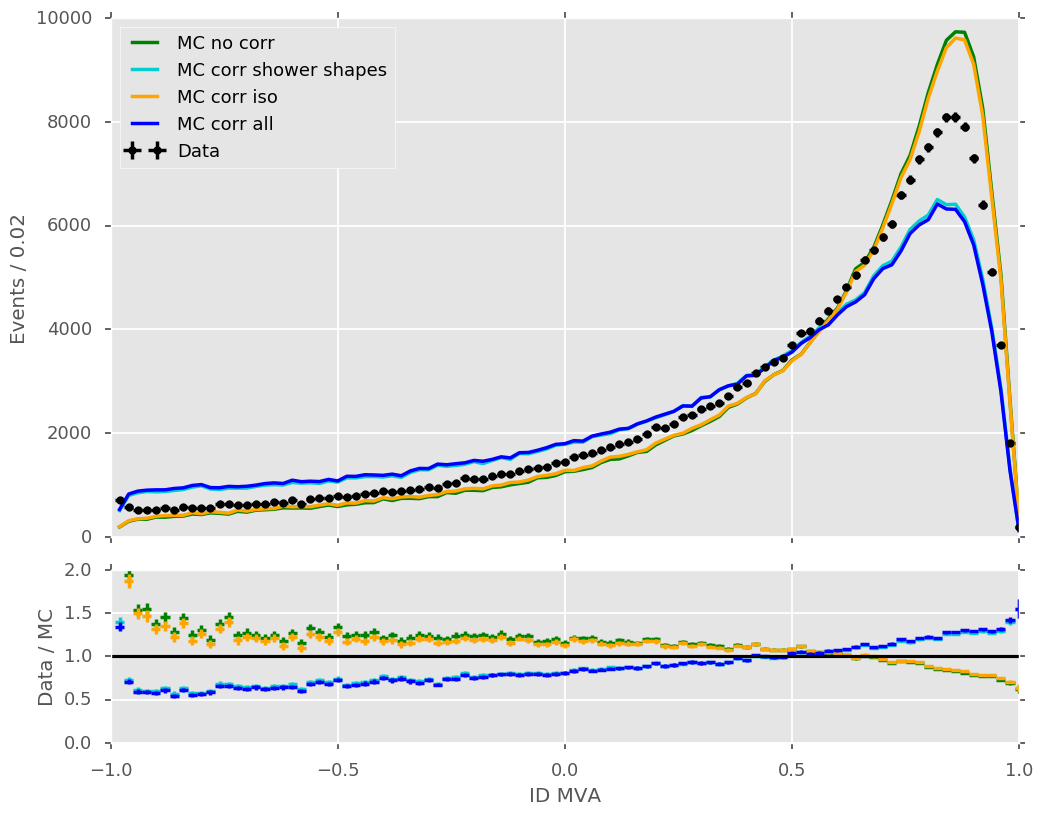

In [13]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr shower shapes',color='darkturquoise'), 
             dict(label='MC corr iso',color='orange'),
             dict(label='MC corr all',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))